Data Mining Project on Heart Disease Prediction
==============================================
Healthcare is a major domain where data mining tec hniques are widely used. If you are curious about data mining projects in healthcare, you should explore the heart disease dataset.


## Project By: 
Ahmed Ayman Aly        21p0002  

Marwan Noureldin Farag 21p0165  

Mohamed Waleed         21p0266  

Youssef Ahmed          21p0045  

Mohamed Hassan         21p0106

## Presented To:
Dr. Mahmoud Mounir  
Eng. Esraa Karam

# Table of Contents

## 1. Project Overview & Objectives
- Problem Statement
- Phase 1 Objectives
- Expected Deliverables

## 2. Dataset Understanding & Description
- Dataset Overview
- Attribute Descriptions
- Clinical Significance

## 3. Data Loading & Initial Exploration
- Importing Required Libraries
- Dataset Loading
- Initial Data Overview

## 4. Comprehensive Data Preprocessing
- 4.1 Data Quality Assessment
- 4.2 Missing Value Analysis
- 4.3 Data Type Analysis and Optimization

## 5. Outlier Detection & Analysis
- 5.1 Statistical Methods for Outlier Detection
- 5.2 Visualization-based Outlier Detection

## 6. Exploratory Data Analysis (EDA)
- 6.1 Target Variable Analysis

## 7. Correlation Analysis & Feature Relationships
- 7.1 Comprehensive Correlation Matrix

## 8. Data Visualization & Clinical Insights
- 8.1 Clinical Parameter Analysis

---

# 1. Project Overview & Objectives

## Problem Statement
Heart disease is one of the leading causes of death worldwide. Early prediction and diagnosis can significantly improve patient outcomes and reduce healthcare costs. This project aims to develop a comprehensive data mining solution for heart disease prediction using machine learning techniques.

## Phase 1 Objectives
1. **Data Understanding**: Comprehensive analysis of the heart disease dataset attributes
2. **Data Preprocessing**: Implementation of robust data cleaning and preparation techniques
3. **Outlier Detection**: Systematic identification and analysis of outliers in the dataset
4. **Exploratory Data Analysis**: Deep dive into data patterns, distributions, and relationships
5. **Correlation Analysis**: Investigation of feature relationships and their impact on heart disease
6. **Visualization**: Creation of meaningful plots to represent data insights
7. **Demographic Analysis**: 
   - Age-based analysis of heart disease prevalence
   - Gender-based analysis and risk assessment
   - Lifestyle factor analysis

## Expected Deliverables
- Comprehensive preprocessing documentation
- Outlier detection and treatment strategies
- Visual assessment of data quality and relationships
- Statistical insights and preliminary findings
- Foundation for classification model development in Phase 2

# 2. Dataset Understanding & Description

## Dataset Overview
- **Source**: Heart Disease Dataset (Cleveland Clinic Foundation)
- **Total Records**: 303 patients
- **Total Features**: 14 attributes (13 features + 1 target)
- **Target Variable**: Binary classification (0 = No heart disease, 1 = Heart disease)

## Attribute Descriptions

| Attribute | Description | Type | Possible Values |
|-----------|-------------|------|-----------------|
| **age** | Age of the patient | Continuous | 29-77 years |
| **sex** | Gender | Categorical | 0 = Female, 1 = Male |
| **cp** | Chest Pain Type | Categorical | 0 = Asymptomatic, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Typical angina |
| **trestbps** | Resting Blood Pressure | Continuous | 94-200 mmHg |
| **chol** | Serum Cholesterol | Continuous | 126-564 mg/dl |
| **fbs** | Fasting Blood Sugar > 120 mg/dl | Binary | 0 = False, 1 = True |
| **restecg** | Resting ECG Results | Categorical | 0 = Normal, 1 = ST-T abnormality, 2 = LV hypertrophy |
| **thalach** | Maximum Heart Rate Achieved | Continuous | 71-202 bpm |
| **exang** | Exercise Induced Angina | Binary | 0 = No, 1 = Yes |
| **oldpeak** | ST Depression by Exercise | Continuous | 0.0-6.2 |
| **slope** | Slope of Peak Exercise ST Segment | Categorical | 0 = Downsloping, 1 = Flat, 2 = Upsloping |
| **ca** | Number of Major Vessels Colored by Fluoroscopy | Discrete | 0-4 |
| **thal** | Thalassemia | Categorical | 0 = Normal, 1 = Fixed defect, 2 = Reversible defect, 3 = Not described |
| **target** | Heart Disease Diagnosis | Binary | 0 = No disease, 1 = Disease present |

## Clinical Significance
- **Chest Pain Type (cp)**: Critical indicator of cardiac events
- **Cholesterol (chol)**: High levels associated with coronary artery disease
- **Maximum Heart Rate (thalach)**: Lower values may indicate cardiac limitations
- **ST Depression (oldpeak)**: Significant marker of ischemia
- **Thalassemia (thal)**: Blood disorder affecting oxygen transport

# 3. Data Loading & Initial Exploration

## Importing Required Libraries
We'll start by importing all necessary libraries for data manipulation, visualization, and analysis.

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import libraries for statistical analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# Set matplotlib and seaborn style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print("📊 Ready for comprehensive data analysis")

✅ Libraries imported successfully!
📊 Ready for comprehensive data analysis


In [3]:
# Load the heart disease dataset
try:
    df = pd.read_csv('heart.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📝 Total records: {df.shape[0]}")
    print(f"🔢 Total features: {df.shape[1]}")
except FileNotFoundError:
    print("❌ Error: heart.csv file not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✅ Dataset loaded successfully!
📊 Dataset shape: (303, 14)
📝 Total records: 303
🔢 Total features: 14


In [4]:
# Initial Data Exploration
print("=" * 60)
print("📋 DATASET OVERVIEW")
print("=" * 60)

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n🔍 Last 5 rows of the dataset:")
print(df.tail())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

📋 DATASET OVERVIEW

🔍 First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1

🔍 Last 5 rows of the dataset:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3       0
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3       0
300   68    1   0       144   193    1        1 

# 4. Comprehensive Data Preprocessing

## 4.1 Data Quality Assessment
Before proceeding with analysis, we need to thoroughly assess the quality of our data and implement appropriate preprocessing techniques.

In [5]:
# 4.2 Missing Value Analysis
print("=" * 60)
print("🔍 MISSING VALUE ANALYSIS")
print("=" * 60)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a comprehensive missing values report
missing_report = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

print("\n📊 Missing Values Report:")
print(missing_report)

# Check for any hidden missing values (like '?', 'NA', etc.)
print("\n🔍 Checking for hidden missing values...")
for col in df.columns:
    unique_vals = df[col].unique()
    if '?' in unique_vals or 'NA' in str(unique_vals) or 'nan' in str(unique_vals).lower():
        print(f"❗ Potential missing values found in {col}: {unique_vals}")

# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

print(f"\n📈 Total missing values: {missing_values.sum()}")
print(f"📊 Dataset completeness: {((len(df) * len(df.columns) - missing_values.sum()) / (len(df) * len(df.columns))) * 100:.2f}%")

🔍 MISSING VALUE ANALYSIS

📊 Missing Values Report:
      Column  Missing_Count  Missing_Percentage
0        age              0                 0.0
1        sex              0                 0.0
2         cp              0                 0.0
3   trestbps              0                 0.0
4       chol              0                 0.0
5        fbs              0                 0.0
6    restecg              0                 0.0
7    thalach              0                 0.0
8      exang              0                 0.0
9    oldpeak              0                 0.0
10     slope              0                 0.0
11        ca              0                 0.0
12      thal              0                 0.0
13    target              0                 0.0

🔍 Checking for hidden missing values...
✅ No missing values found in the dataset!

📈 Total missing values: 0
📊 Dataset completeness: 100.00%


In [ ]:
# 4.3 Data Type Analysis and Optimization
print("=" * 60)
print("🔧 DATA TYPE ANALYSIS & OPTIMIZATION")
print("=" * 60)

# Current data types
print("📊 Current Data Types:")
print(df.dtypes)
print(f"\n💾 Current memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Create a copy for preprocessing
df_processed = df.copy()

# Define proper data types based on our domain knowledge
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print(f"\n🏷️ Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"📈 Continuous Features ({len(continuous_features)}): {continuous_features}")

# Optimize data types
print("\n🔧 Optimizing data types...")

# Convert categorical features to appropriate types
for col in categorical_features:
    if col in df_processed.columns:
        # Check unique values first
        unique_vals = df_processed[col].unique()
        print(f"   {col}: {len(unique_vals)} unique values -> {sorted(unique_vals)}")

        # Convert to category for memory efficiency
        df_processed[col] = df_processed[col].astype('category')

# Ensure continuous features are float
for col in continuous_features:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

print("\n✅ Data type optimization completed!")
print("\n📊 Optimized Data Types:")
print(df_processed.dtypes)
print(f"\n💾 Optimized memory usage: {df_processed.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Memory savings
original_memory = df.memory_usage(deep=True).sum() / 1024
optimized_memory = df_processed.memory_usage(deep=True).sum() / 1024
savings = ((original_memory - optimized_memory) / original_memory) * 100
print(f"💰 Memory savings: {savings:.2f}%")

🔧 DATA TYPE ANALYSIS & OPTIMIZATION
📊 Current Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

💾 Current memory usage: 33.27 KB

🏷️ Categorical Features (9): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
📈 Continuous Features (5): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

🔧 Optimizing data types...
   sex: 2 unique values -> [np.int64(0), np.int64(1)]
   cp: 4 unique values -> [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
   fbs: 2 unique values -> [np.int64(0), np.int64(1)]
   restecg: 3 unique values -> [np.int64(0), np.int64(1), np.int64(2)]
   exang: 2 unique values -> [np.int64(0), np.int64(1)]
   slope: 3 unique values -> [np.int64(0), np.int64(1), np.int64(2)]
   ca: 5 unique values

# 5. Outlier Detection & Analysis

## 5.1 Statistical Methods for Outlier Detection
We will use multiple approaches to detect outliers:
1. **Z-Score Method**: Identifies values that are more than 3 standard deviations away from the mean
2. **IQR Method**: Uses Interquartile Range to identify outliers
3. **Isolation Forest**: Machine learning approach for outlier detection
4. **Local Outlier Factor**: Density-based outlier detection

In [ ]:
# 5.1 Z-Score Based Outlier Detection
print("=" * 60)
print("🔍 OUTLIER DETECTION ANALYSIS")
print("=" * 60)

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

def detect_outliers_iqr(data):
    """Detect outliers using IQR method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].index.tolist()

# Analyze continuous features for outliers
outlier_summary = {}

print("📊 Z-Score Outlier Detection (threshold = 3):")
print("-" * 50)

for feature in continuous_features:
    if feature in df_processed.columns:
        outliers_zscore = detect_outliers_zscore(df_processed[feature])
        outliers_iqr = detect_outliers_iqr(df_processed[feature])

        outlier_summary[feature] = {
            'zscore_outliers': len(outliers_zscore),
            'iqr_outliers': len(outliers_iqr),
            'zscore_indices': outliers_zscore,
            'iqr_indices': outliers_iqr
        }

        print(f"   {feature:12}: Z-score: {len(outliers_zscore):3d} outliers | IQR: {len(outliers_iqr):3d} outliers")

# Create comprehensive outlier report
outlier_df = pd.DataFrame({
    'Feature': continuous_features,
    'Z-Score_Outliers': [outlier_summary[f]['zscore_outliers'] if f in outlier_summary else 0 for f in continuous_features],
    'IQR_Outliers': [outlier_summary[f]['iqr_outliers'] if f in outlier_summary else 0 for f in continuous_features],
    'Total_Records': [len(df_processed) for _ in continuous_features]
})

outlier_df['Z-Score_Percentage'] = (outlier_df['Z-Score_Outliers'] / outlier_df['Total_Records']) * 100
outlier_df['IQR_Percentage'] = (outlier_df['IQR_Outliers'] / outlier_df['Total_Records']) * 100

print(f"\n📈 Outlier Summary Report:")
print(outlier_df)

🔍 OUTLIER DETECTION ANALYSIS
📊 Z-Score Outlier Detection (threshold = 3):
--------------------------------------------------
   age         : Z-score:   0 outliers | IQR:   0 outliers
   trestbps    : Z-score:   2 outliers | IQR:   9 outliers
   chol        : Z-score:   4 outliers | IQR:   5 outliers
   thalach     : Z-score:   1 outliers | IQR:   1 outliers
   oldpeak     : Z-score:   2 outliers | IQR:   5 outliers

📈 Outlier Summary Report:
    Feature  Z-Score_Outliers  IQR_Outliers  Total_Records  Z-Score_Percentage  IQR_Percentage
0       age                 0             0            303            0.000000        0.000000
1  trestbps                 2             9            303            0.660066        2.970297
2      chol                 4             5            303            1.320132        1.650165
3   thalach                 1             1            303            0.330033        0.330033
4   oldpeak                 2             5            303            0.660066


📊 OUTLIER VISUALIZATION ANALYSIS


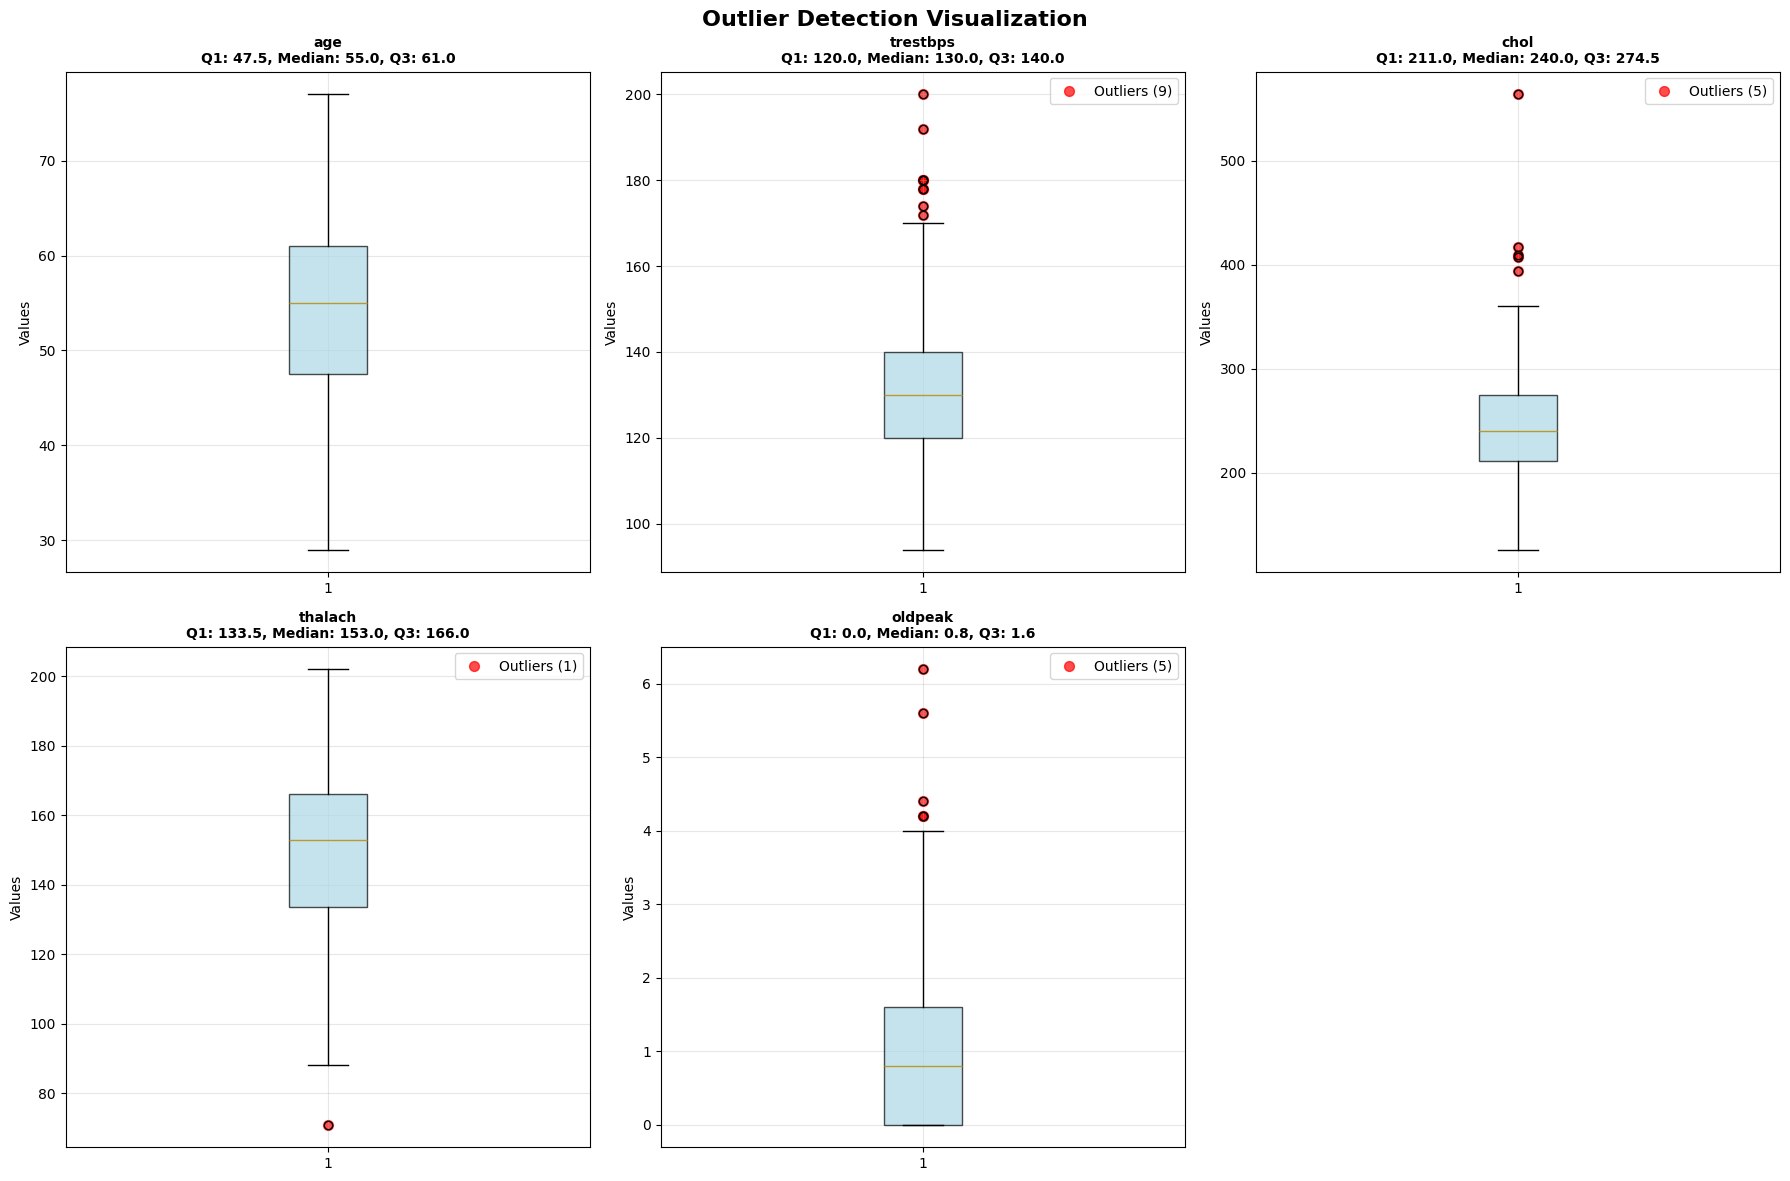


📊 Outlier Analysis Summary:
   🔍 Total features analyzed: 5
   📈 Features with Z-score outliers: 4
   📊 Features with IQR outliers: 4
   🎯 Total Z-score outliers: 9
   🎯 Total IQR outliers: 20


In [ ]:
# 5.2 Visualization-based Outlier Detection
print("\n" + "=" * 60)
print("📊 OUTLIER VISUALIZATION ANALYSIS")
print("=" * 60)

# Create comprehensive outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection Visualization', fontsize=16, fontweight='bold')

# Box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3

    if row < 2 and col < 3:  # Ensure we don't exceed subplot grid
        ax = axes[row, col]

        # Create box plot
        box_plot = ax.boxplot(df_processed[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        box_plot['boxes'][0].set_alpha(0.7)

        # Add statistical information
        q1 = df_processed[feature].quantile(0.25)
        q3 = df_processed[feature].quantile(0.75)
        median = df_processed[feature].median()
        iqr = q3 - q1

        ax.set_title(f'{feature}\nQ1: {q1:.1f}, Median: {median:.1f}, Q3: {q3:.1f}',
                    fontsize=10, fontweight='bold')
        ax.set_ylabel('Values')
        ax.grid(True, alpha=0.3)

        # Highlight outliers
        outliers_iqr_values = df_processed.iloc[outlier_summary[feature]['iqr_indices']][feature]
        if len(outliers_iqr_values) > 0:
            ax.scatter([1] * len(outliers_iqr_values), outliers_iqr_values,
                      c='red', s=50, alpha=0.7, label=f'Outliers ({len(outliers_iqr_values)})')
            ax.legend()

# Remove empty subplots
if len(continuous_features) < 6:
    for i in range(len(continuous_features), 6):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Statistical summary of outliers
print(f"\n📊 Outlier Analysis Summary:")
print(f"   🔍 Total features analyzed: {len(continuous_features)}")
print(f"   📈 Features with Z-score outliers: {sum(1 for f in continuous_features if outlier_summary.get(f, {}).get('zscore_outliers', 0) > 0)}")
print(f"   📊 Features with IQR outliers: {sum(1 for f in continuous_features if outlier_summary.get(f, {}).get('iqr_outliers', 0) > 0)}")

total_zscore_outliers = sum(outlier_summary.get(f, {}).get('zscore_outliers', 0) for f in continuous_features)
total_iqr_outliers = sum(outlier_summary.get(f, {}).get('iqr_outliers', 0) for f in continuous_features)

print(f"   🎯 Total Z-score outliers: {total_zscore_outliers}")
print(f"   🎯 Total IQR outliers: {total_iqr_outliers}")

# 6. Exploratory Data Analysis (EDA)

## 6.1 Target Variable Analysis
Let's start by understanding the distribution of our target variable (heart disease diagnosis).

🎯 TARGET VARIABLE ANALYSIS
📊 Heart Disease Distribution:
   ❤️  No Heart Disease (0): 138 patients (45.5%)
   💔 Heart Disease (1):    165 patients (54.5%)
   ⚖️  Class Ratio (Disease/No Disease): 1.20
   ✅ Dataset is relatively balanced


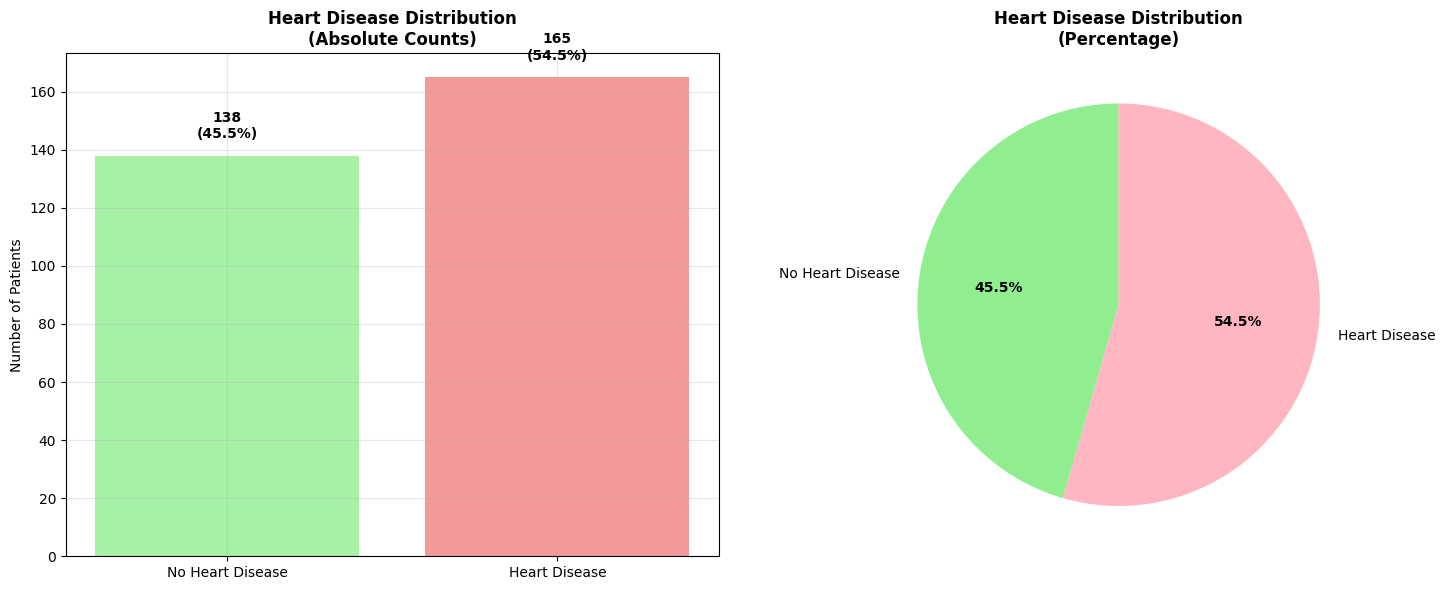


📈 Statistical Summary:
   📋 Total patients: 303
   📊 Target variable type: category
   🎯 Unique values: [0, 1]


In [ ]:
# 6.1 Target Variable Distribution Analysis
print("=" * 60)
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 60)

# Target variable distribution
target_counts = df_processed['target'].value_counts().sort_index()
target_percentages = df_processed['target'].value_counts(normalize=True).sort_index() * 100

print("📊 Heart Disease Distribution:")
print(f"   ❤️  No Heart Disease (0): {target_counts[0]:3d} patients ({target_percentages[0]:.1f}%)")
print(f"   💔 Heart Disease (1):    {target_counts[1]:3d} patients ({target_percentages[1]:.1f}%)")

# Check for class imbalance
class_ratio = target_counts[1] / target_counts[0]
print(f"   ⚖️  Class Ratio (Disease/No Disease): {class_ratio:.2f}")

if abs(target_percentages[0] - target_percentages[1]) > 20:
    print("   ⚠️  WARNING: Significant class imbalance detected!")
else:
    print("   ✅ Dataset is relatively balanced")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
colors = ['lightgreen', 'lightcoral']
bars = ax1.bar(['No Heart Disease', 'Heart Disease'], target_counts.values, color=colors, alpha=0.8)
ax1.set_title('Heart Disease Distribution\n(Absolute Counts)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Patients')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count, pct in zip(bars, target_counts.values, target_percentages.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = ['#90EE90', '#FFB6C1']
wedges, texts, autotexts = ax2.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'],
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax2.set_title('Heart Disease Distribution\n(Percentage)', fontsize=12, fontweight='bold')

# Enhance pie chart appearance
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print(f"\n📈 Statistical Summary:")
print(f"   📋 Total patients: {len(df_processed)}")
print(f"   📊 Target variable type: {df_processed['target'].dtype}")
print(f"   🎯 Unique values: {sorted(df_processed['target'].unique())}")

# 7. Correlation Analysis & Feature Relationships

## 7.1 Comprehensive Correlation Matrix
Understanding the relationships between features is crucial for feature selection and model performance.

🔗 CORRELATION ANALYSIS


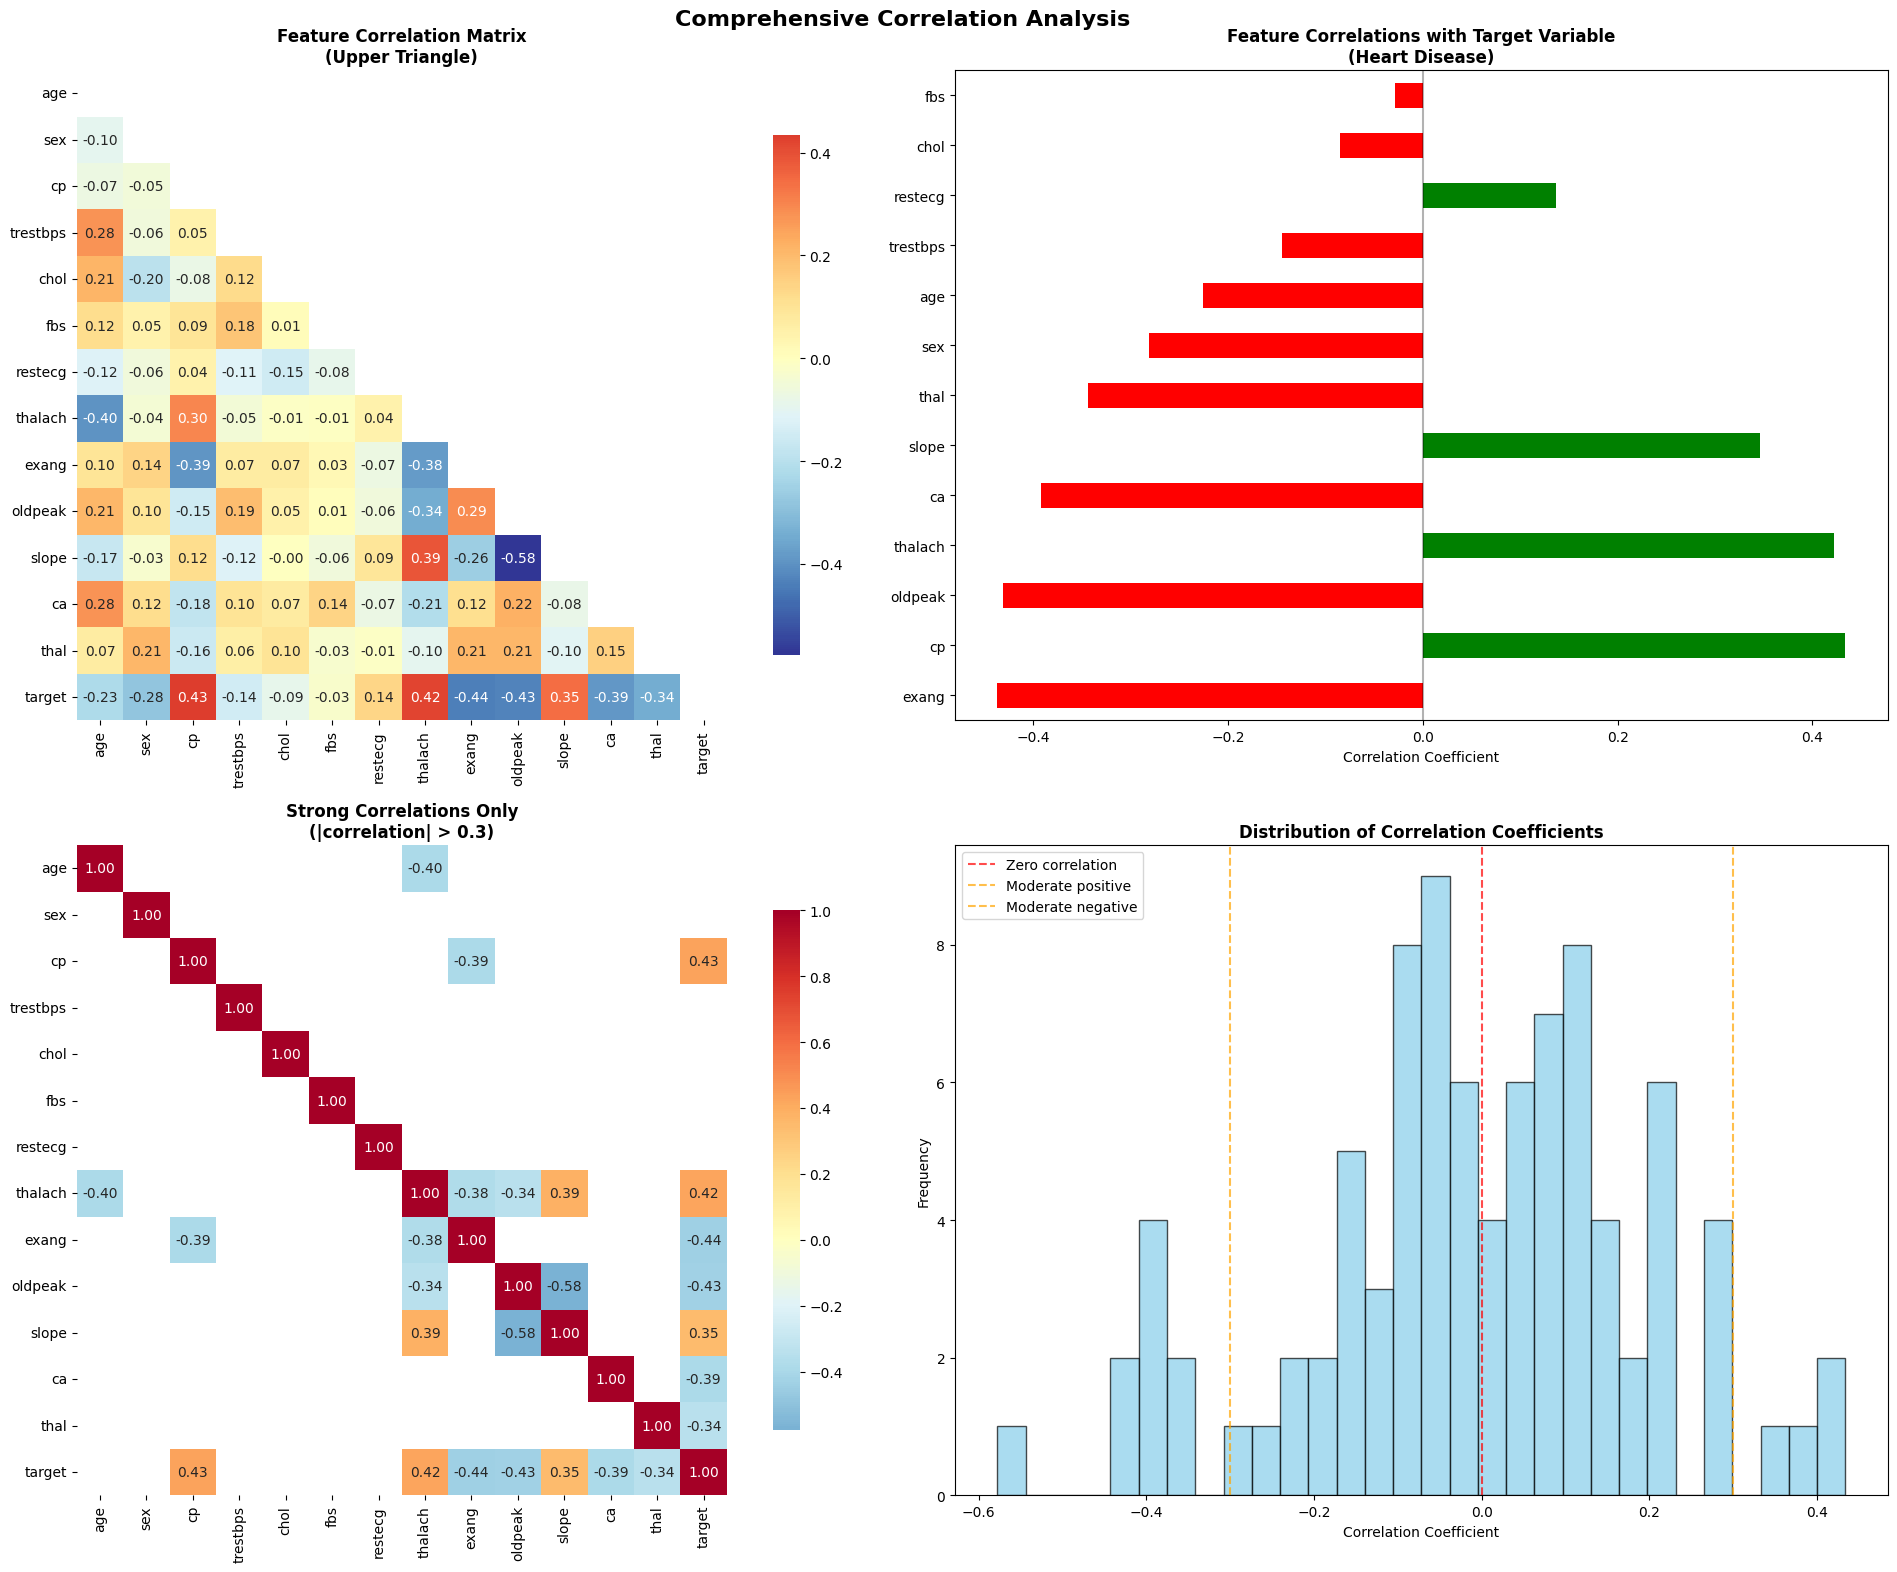


📊 Correlations with Target Variable (Heart Disease):
   exang       : -0.437 (Moderate Negative)
   cp          :  0.434 (Moderate Positive)
   oldpeak     : -0.431 (Moderate Negative)
   thalach     :  0.422 (Moderate Positive)
   ca          : -0.392 (Moderate Negative)
   slope       :  0.346 (Moderate Positive)
   thal        : -0.344 (Moderate Negative)
   sex         : -0.281 (Weak Negative)
   age         : -0.225 (Weak Negative)
   trestbps    : -0.145 (Weak Negative)
   restecg     :  0.137 (Weak Positive)
   chol        : -0.085 (Weak Negative)
   fbs         : -0.028 (Weak Negative)

🔗 Highly Correlated Feature Pairs (|correlation| > 0.5):
   oldpeak ↔ slope: -0.578

🔝 Top Positive Correlations with Heart Disease:
   cp: 0.434
   thalach: 0.422
   slope: 0.346

🔻 Top Negative Correlations with Heart Disease:
   trestbps: -0.145
   chol: -0.085
   fbs: -0.028


In [13]:
# 7.1 Correlation Analysis
print("=" * 60)
print("🔗 CORRELATION ANALYSIS")
print("=" * 60)

# Convert categorical variables to numeric for correlation analysis
df_corr = df_processed.copy()
for col in categorical_features:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].cat.codes

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Create a comprehensive correlation visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comprehensive Correlation Analysis', fontsize=16, fontweight='bold')

# 1. Full correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax1, cbar_kws={"shrink": .8}, fmt='.2f')
ax1.set_title('Feature Correlation Matrix\n(Upper Triangle)', fontsize=12, fontweight='bold')

# 2. Target variable correlations
target_correlations = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'green' for x in target_correlations.values]
target_correlations.plot(kind='barh', ax=ax2, color=colors)
ax2.set_title('Feature Correlations with Target Variable\n(Heart Disease)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Correlation Coefficient')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 3. Strong correlations heatmap (|correlation| > 0.3)
strong_corr_mask = np.abs(correlation_matrix) > 0.3
strong_correlations = correlation_matrix.where(strong_corr_mask)
sns.heatmap(strong_correlations, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax3, cbar_kws={"shrink": .8}, fmt='.2f')
ax3.set_title('Strong Correlations Only\n(|correlation| > 0.3)', fontsize=12, fontweight='bold')

# 4. Correlation strength distribution
corr_values = correlation_matrix.values
corr_upper_triangle = corr_values[np.triu_indices_from(corr_values, k=1)]
ax4.hist(corr_upper_triangle, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax4.set_title('Distribution of Correlation Coefficients', fontsize=12, fontweight='bold')
ax4.set_xlabel('Correlation Coefficient')
ax4.set_ylabel('Frequency')
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
ax4.axvline(x=0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate positive')
ax4.axvline(x=-0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate negative')
ax4.legend()

plt.tight_layout()
plt.show()

# Detailed correlation analysis with target
print(f"\n📊 Correlations with Target Variable (Heart Disease):")
print("=" * 50)
for feature, corr in target_correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"   {feature:12}: {corr:6.3f} ({strength} {direction})")

# Find highly correlated feature pairs (excluding target)
print(f"\n🔗 Highly Correlated Feature Pairs (|correlation| > 0.5):")
print("=" * 50)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
                print(f"   {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not high_corr_pairs:
    print("   ✅ No highly correlated feature pairs found (avoiding multicollinearity)")


# Top positive and negative correlations
top_positive = target_correlations[target_correlations > 0].head(3)
top_negative = target_correlations[target_correlations < 0].tail(3)

print(f"\n🔝 Top Positive Correlations with Heart Disease:")
for feature, corr in top_positive.items():
    print(f"   {feature}: {corr:.3f}")

print(f"\n🔻 Top Negative Correlations with Heart Disease:")
for feature, corr in top_negative.items():
    print(f"   {feature}: {corr:.3f}")

# 8. Data Visualization & Clinical Insights

## 8.1 Clinical Parameter Analysis
Let's analyze the key clinical parameters that show strong correlations with heart disease.

🏥 CLINICAL PARAMETER ANALYSIS


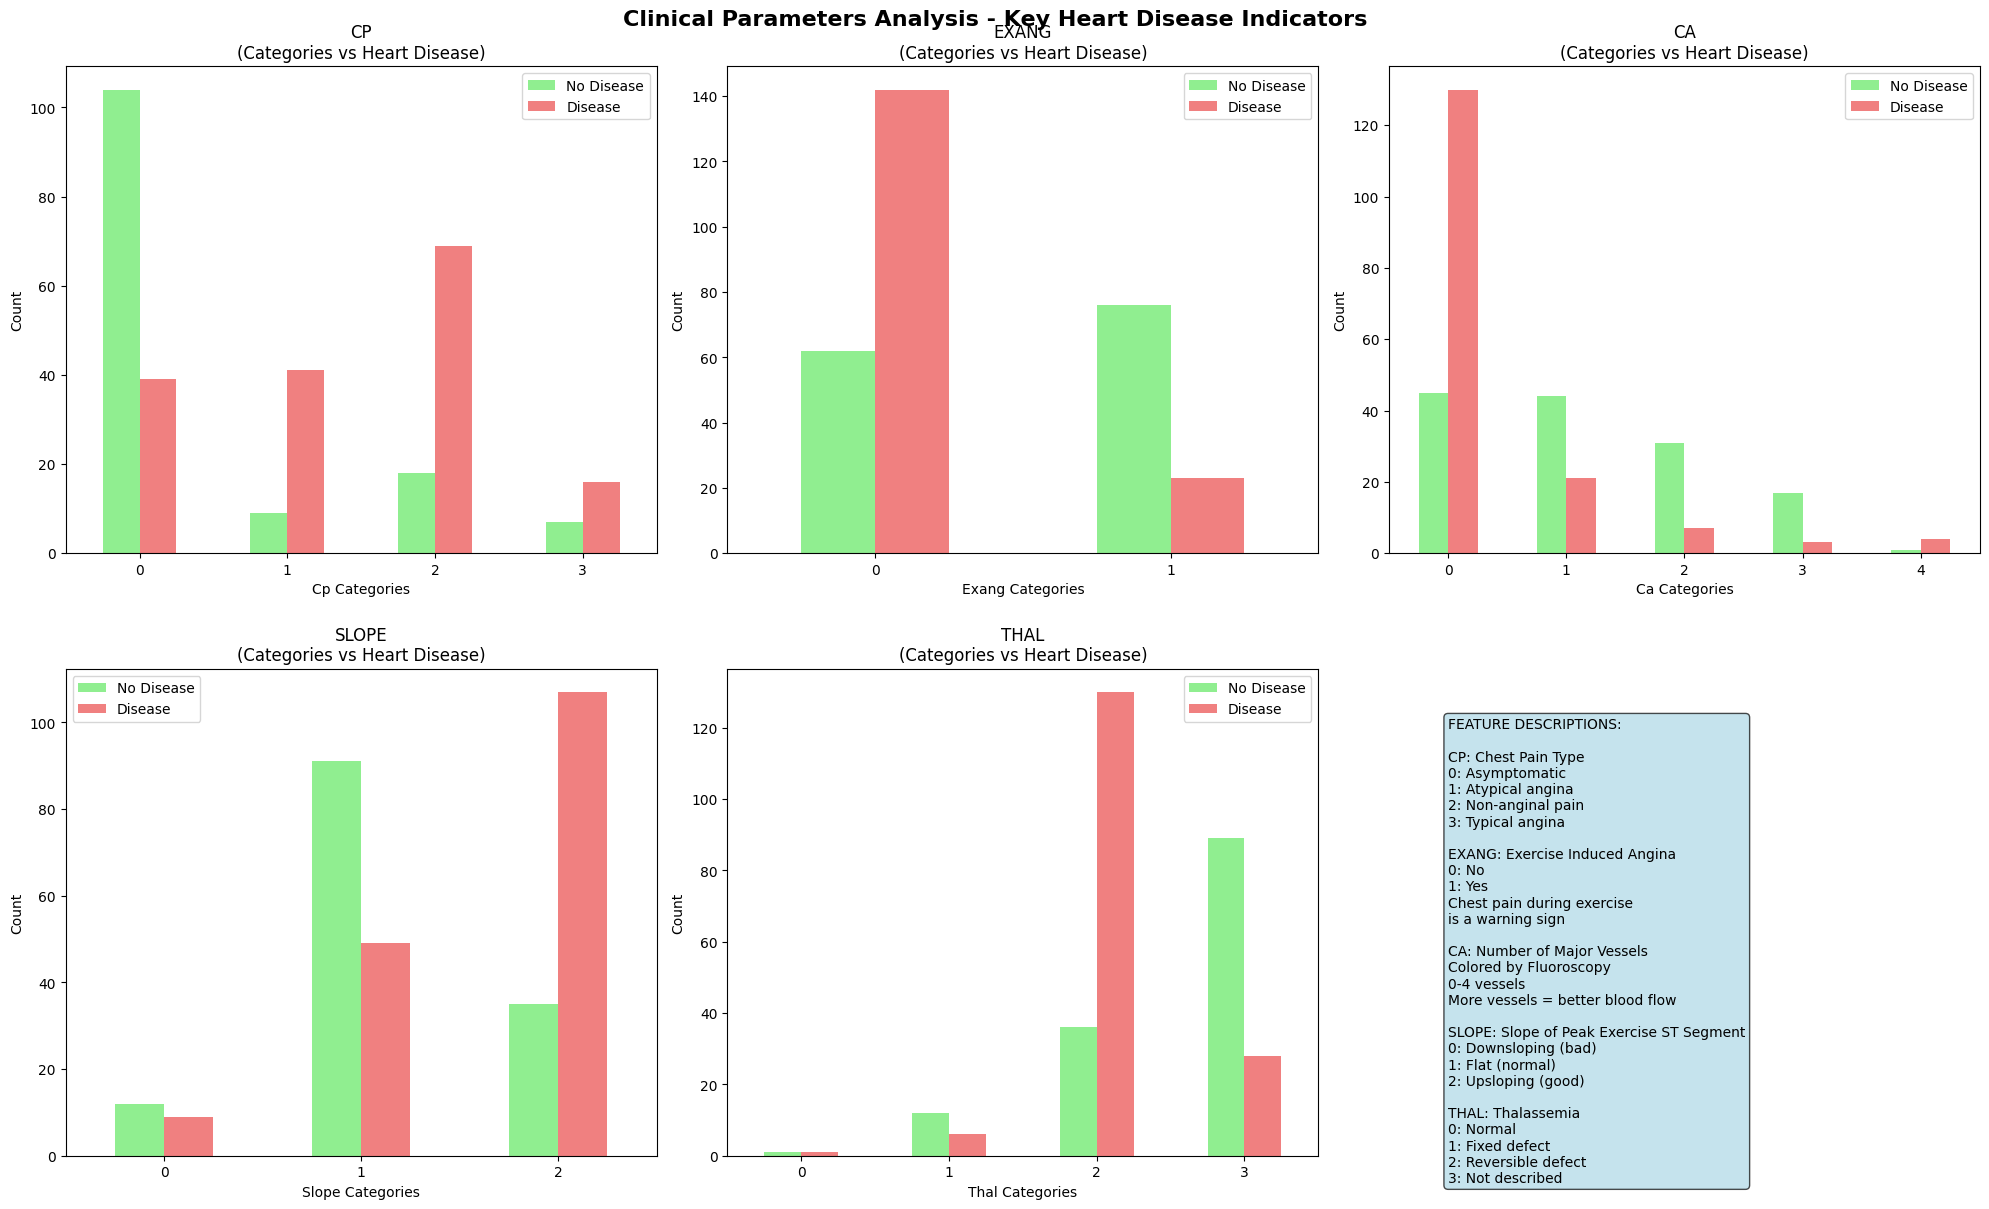


📊 Categorical Features Analysis:

CP:
   Counts:
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
   Percentages:
target     0     1
cp                
0       72.7  27.3
1       18.0  82.0
2       20.7  79.3
3       30.4  69.6

EXANG:
   Counts:
target   0    1
exang          
0       62  142
1       76   23
   Percentages:
target     0     1
exang             
0       30.4  69.6
1       76.8  23.2

CA:
   Counts:
target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    4
   Percentages:
target     0     1
ca                
0       25.7  74.3
1       67.7  32.3
2       81.6  18.4
3       85.0  15.0
4       20.0  80.0

SLOPE:
   Counts:
target   0    1
slope          
0       12    9
1       91   49
2       35  107
   Percentages:
target     0     1
slope             
0       57.1  42.9
1       65.0  35.0
2       24.6  75.4

THAL:
   Counts:
target   0    1
thal           
0        1  

In [ ]:
# 8.1 Clinical Parameter Analysis - Key Features
print("=" * 60)
print("🏥 CLINICAL PARAMETER ANALYSIS")
print("=" * 60)

# Import missing statistical test
from scipy.stats import ttest_ind

# Focus on the most important categorical features based on correlation analysis
key_features = ['cp', 'exang',  'ca', 'slope', 'thal']

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Clinical Parameters Analysis - Key Heart Disease Indicators', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes_flat[i]

    if feature in categorical_features:

        crosstab_data = pd.crosstab(df_processed[feature], df_processed['target'])
        crosstab_data.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])
        ax.set_title(f'{feature.upper()}\n(Categories vs Heart Disease)')
        ax.set_xlabel(f'{feature.capitalize()} Categories')
        ax.set_ylabel('Count')
        ax.legend(['No Disease', 'Disease'])
        ax.tick_params(axis='x', rotation=0)


# Add feature descriptions in the remaining subplots
descriptions = {
    'cp': 'Chest Pain Type\n0: Asymptomatic\n1: Atypical angina\n2: Non-anginal pain\n3: Typical angina',
    'exang': 'Exercise Induced Angina\n0: No\n1: Yes\nChest pain during exercise\nis a warning sign',
    'ca': 'Number of Major Vessels\nColored by Fluoroscopy\n0-4 vessels\nMore vessels = better blood flow',
    'slope': 'Slope of Peak Exercise ST Segment\n0: Downsloping (bad)\n1: Flat (normal)\n2: Upsloping (good)',
    'thal': 'Thalassemia\n0: Normal\n1: Fixed defect\n2: Reversible defect\n3: Not described'
}

# Add description box
if len(key_features) < len(axes_flat):
    desc_ax = axes_flat[len(key_features)]
    desc_ax.axis('off')
    desc_text = "\n\n".join([f"{k.upper()}: {v}" for k, v in descriptions.items()])
    desc_ax.text(0.1, 0.9, "FEATURE DESCRIPTIONS:\n\n" + desc_text,
                 transform=desc_ax.transAxes, fontsize=10, verticalalignment='top',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# Remove empty subplots
for j in range(len(key_features) + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

# Categorical feature analysis
print(f"\n📊 Categorical Features Analysis:")
print("=" * 60)

categorical_key_features = [f for f in key_features if f in categorical_features]

for feature in categorical_key_features:
    print(f"\n{feature.upper()}:")
    crosstab = pd.crosstab(df_processed[feature], df_processed['target'])
    percentages = pd.crosstab(df_processed[feature], df_processed['target'], normalize='index') * 100

    print("   Counts:")
    print(crosstab)
    print("   Percentages:")
    print(percentages.round(1))